 # **Set up Kaggle API access in Colab**

In [ ]:
# Configure Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download the dataset from Kaggle**

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset


Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 94% 310M/330M [00:05<00:00, 42.5MB/s]
100% 330M/330M [00:06<00:00, 56.8MB/s]


 # **Unzip the dataset**

In [ ]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("face-mask-12k-images-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("face_mask_12k")

# Check the directory structure
os.listdir("face_mask_12k")


['Face Mask Dataset']

# **Explore dataset folders**

# **Count images per class**

In [ ]:
# List subfolders to confirm structure
image_root = "face_mask_12k/Face Mask Dataset/"

for folder in os.listdir(image_root):
    print(f"{folder} => {len(os.listdir(os.path.join(image_root, folder)))} images")


Test => 2 images
Train => 2 images
Validation => 2 images


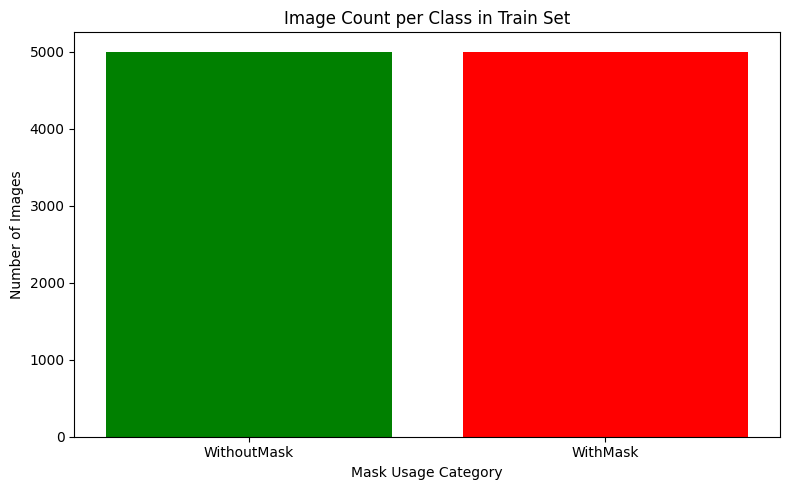

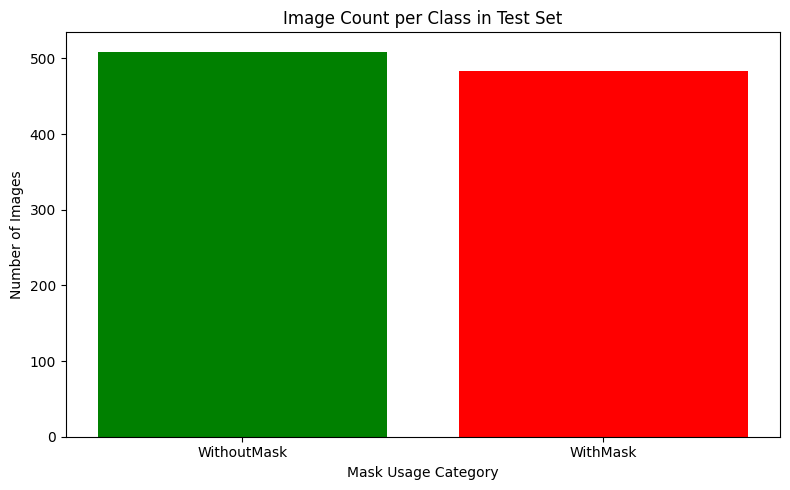

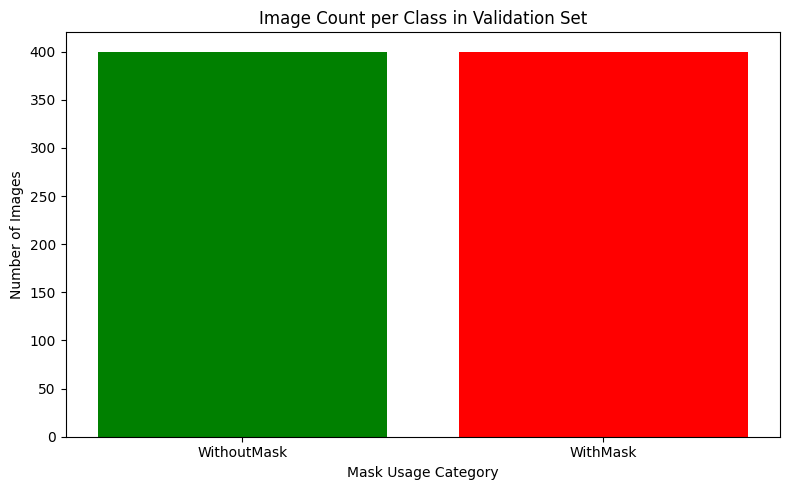

In [ ]:
import os
import matplotlib.pyplot as plt

splits = ['Train', 'Test', 'Validation']
root_path = "/content/face_mask_12k/Face Mask Dataset/"

for split in splits:
    split_path = os.path.join(root_path, split)
    labels = []
    image_counts = []

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            labels.append(category)
            image_counts.append(len(os.listdir(category_path)))

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(labels, image_counts, color=['green', 'red', 'orange'])
    plt.title(f"Image Count per Class in {split} Set")
    plt.xlabel("Mask Usage Category")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()


Total number of images per class across all splits:

WithoutMask: 5909 images
WithMask: 5883 images


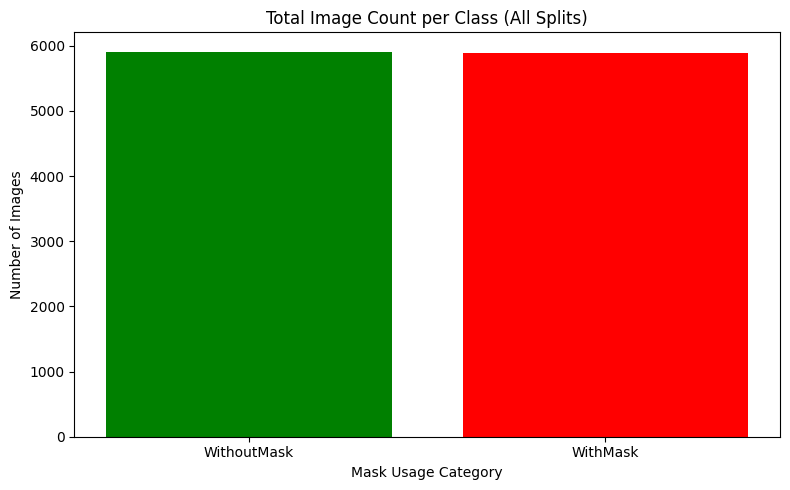

In [ ]:
import os
from collections import defaultdict

# Root path to dataset
root_path = "/content/face_mask_12k/Face Mask Dataset"
splits = ['Train', 'Test', 'Validation']
class_counts = defaultdict(int)

# Count images for each class across all splits
for split in splits:
    split_path = os.path.join(root_path, split)

    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            class_counts[category] += num_images

# Display results
print("Total number of images per class across all splits:\n")
for category, count in class_counts.items():
    print(f"{category}: {count} images")

# Optional: Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red', 'orange'])
plt.title("Total Image Count per Class (All Splits)")
plt.xlabel("Mask Usage Category")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


# **Display sample images from each class**

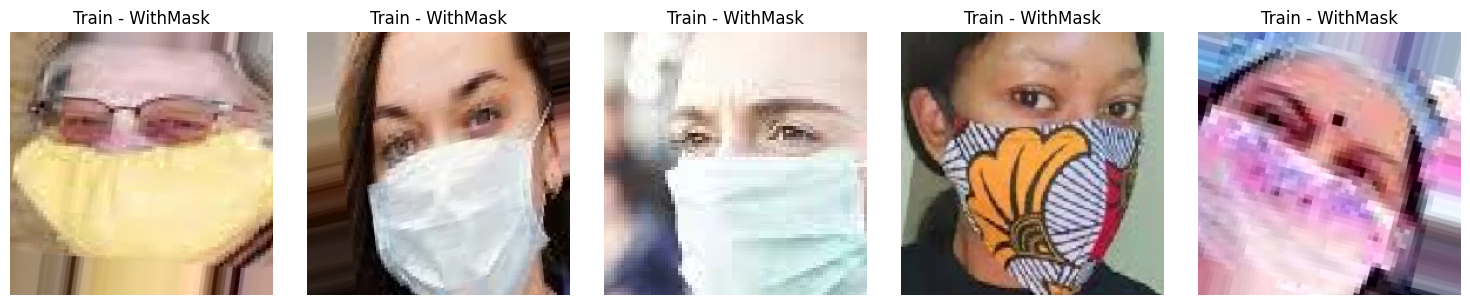

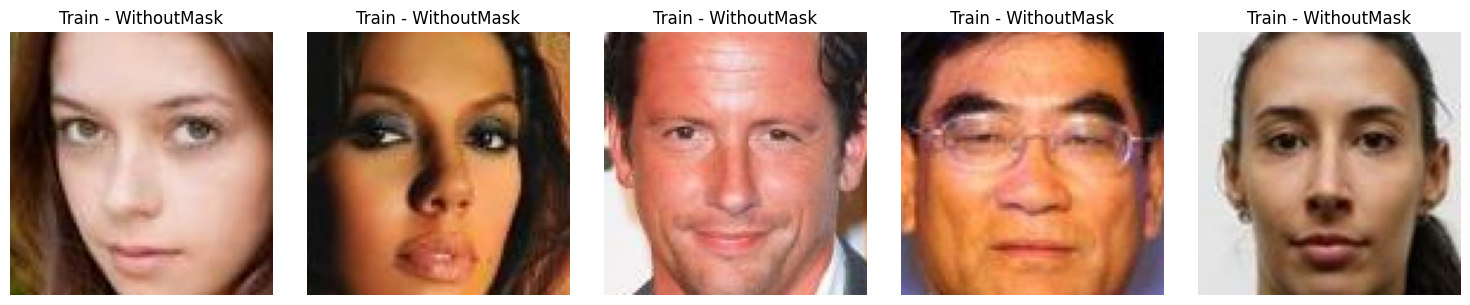

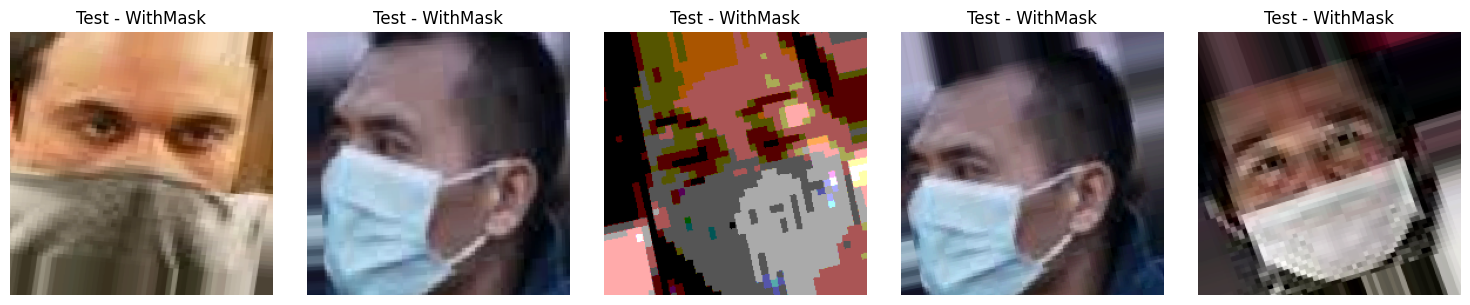

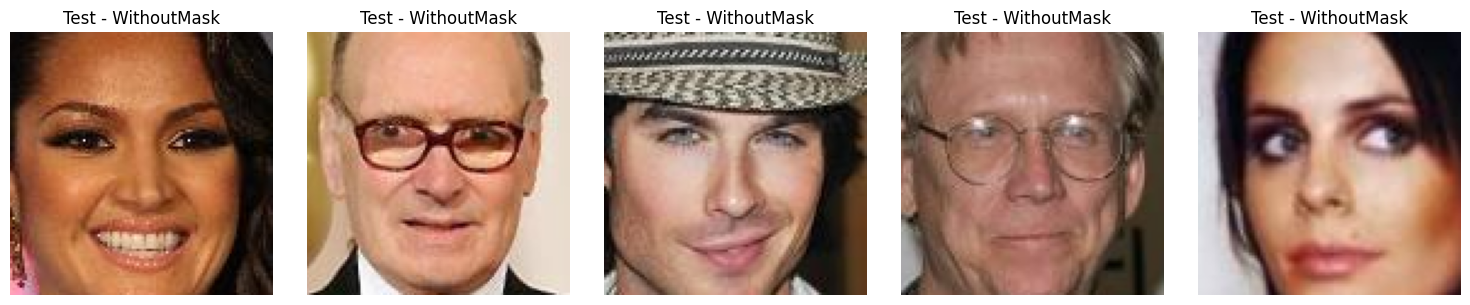

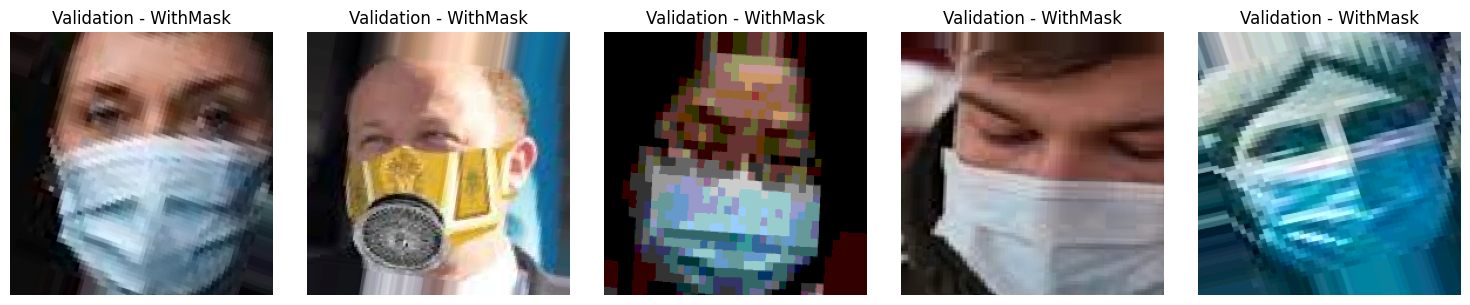

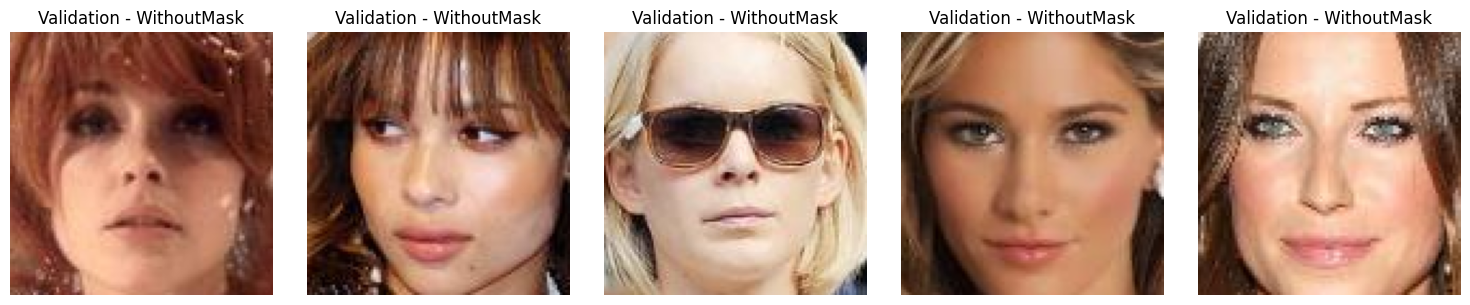

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Define dataset root and splits
dataset_root = "/content/face_mask_12k/Face Mask Dataset"
splits = ['Train', 'Test', 'Validation']

def show_sample_images(split, label_folder):
    path = os.path.join(dataset_root, split, label_folder)
    sample_imgs = random.sample(os.listdir(path), 5)
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_imgs):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{split} - {label_folder}")
    plt.tight_layout()
    plt.show()

# Loop through all splits and all labels in each split
for split in splits:
    split_path = os.path.join(dataset_root, split)
    class_labels = os.listdir(split_path)

    for lbl in class_labels:
        show_sample_images(split, lbl)


# **Model With Augmentation**

## **Transfer Learning Model**


--- Training and Evaluating VGG16 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8186 - loss: 0.4042

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 145s 456ms/step - accuracy: 0.8189 - loss: 0.4038 - val_accuracy: 0.9563 - val_loss: 0.1251
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 0.9688 - loss: 0.1920

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9688 - loss: 0.1920 - val_accuracy: 0.9563 - val_loss: 0.1243
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9517 - loss: 0.1432

312/312 ━━━━━━━━━━━━━━━━━━━━ 194s 448ms/step - accuracy: 0.9517 - loss: 0.1432 - val_accuracy: 0.9613 - val_loss: 0.1030
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 154ms/step - accuracy: 1.0000 - loss: 0.0599

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 1.0000 - loss: 0.0599 - val_accuracy: 0.9625 - val_loss: 0.1026
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9584 - loss: 0.1116

312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 449ms/step - accuracy: 0.9584 - loss: 0.1116 - val_accuracy: 0.9737 - val_loss: 0.0713
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 1.0000 - loss: 0.0324

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 1.0000 - loss: 0.0324 - val_accuracy: 0.9712 - val_loss: 0.0703
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9634 - loss: 0.1005

312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 446ms/step - accuracy: 0.9635 - loss: 0.1005 - val_accuracy: 0.9762 - val_loss: 0.0629
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 1.0000 - loss: 0.0337

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0337 - val_accuracy: 0.9762 - val_loss: 0.0617
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 444ms/step - accuracy: 0.9657 - loss: 0.0861 - val_accuracy: 0.9712 - val_loss: 0.0750
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - accuracy: 1.0000 - loss: 0.0532

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0532 - val_accuracy: 0.9725 - val_loss: 0.0740
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9716 - loss: 0.0846

312/312 ━━━━━━━━━━━━━━━━━━━━ 138s 443ms/step - accuracy: 0.9716 - loss: 0.0846 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 0.9688 - loss: 0.0883

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9688 - loss: 0.0883 - val_accuracy: 0.9850 - val_loss: 0.0431
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.9763 - loss: 0.0716

312/312 ━━━━━━━━━━━━━━━━━━━━ 205s 467ms/step - accuracy: 0.9763 - loss: 0.0716 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 14/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.9062 - loss: 0.1538

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9062 - loss: 0.1538 - val_accuracy: 0.9887 - val_loss: 0.0396
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 142s 456ms/step - accuracy: 0.9757 - loss: 0.0705 - val_accuracy: 0.9700 - val_loss: 0.0700
Epoch 16/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 1.0000 - loss: 0.0256

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.9725 - val_loss: 0.0621
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9791 - loss: 0.0634

312/312 ━━━━━━━━━━━━━━━━━━━━ 143s 459ms/step - accuracy: 0.9791 - loss: 0.0634 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 18/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 156ms/step - accuracy: 0.9062 - loss: 0.1329

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9062 - loss: 0.1329 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 141s 453ms/step - accuracy: 0.9753 - loss: 0.0669 - val_accuracy: 0.9850 - val_loss: 0.0413
Epoch 20/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.9688 - loss: 0.0747

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9688 - loss: 0.0747 - val_accuracy: 0.9850 - val_loss: 0.0434
VGG16 training finished in 1745.31 seconds.

Evaluating VGG16 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9888 - loss: 0.0360
VGG16 Test Loss: 0.0381, Test Accuracy: 0.9869
VGG16 testing finished in 10.32 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step

VGG16 Classification Report:
              precision    recall  f1-score   support

    WithMask       0.98      0.99      0.99       483
 WithoutMask       0.99      0.98      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992


VGG16 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


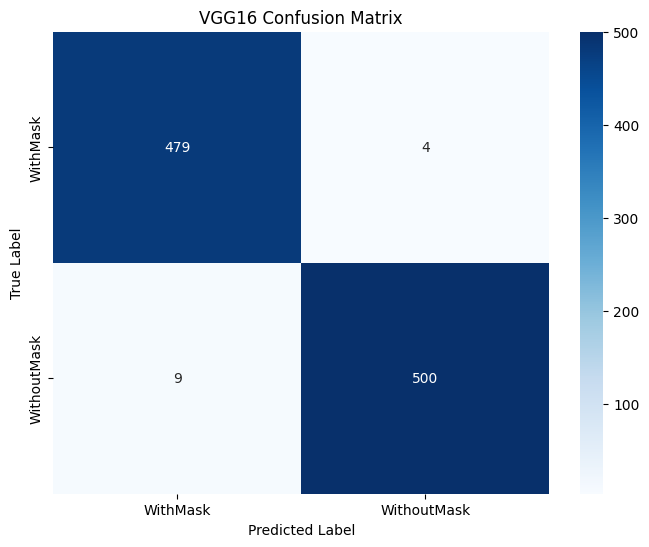

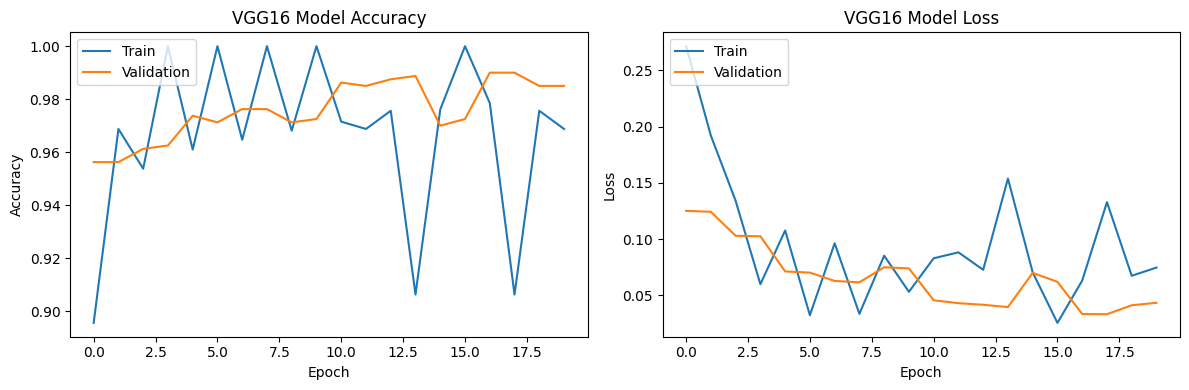


--- Training and Evaluating ResNet50 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for ResNet50...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5398 - loss: 0.7092

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 157s 471ms/step - accuracy: 0.5398 - loss: 0.7091 - val_accuracy: 0.6587 - val_loss: 0.6498
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 36s 119ms/step - accuracy: 0.7500 - loss: 0.6339

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.6339 - val_accuracy: 0.6237 - val_loss: 0.6520
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.5926 - loss: 0.6583

312/312 ━━━━━━━━━━━━━━━━━━━━ 180s 419ms/step - accuracy: 0.5926 - loss: 0.6583 - val_accuracy: 0.6425 - val_loss: 0.6346
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.5938 - loss: 0.6394

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5938 - loss: 0.6394 - val_accuracy: 0.6425 - val_loss: 0.6344
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6081 - loss: 0.6462

312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 420ms/step - accuracy: 0.6081 - loss: 0.6462 - val_accuracy: 0.6650 - val_loss: 0.6177
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.7188 - loss: 0.6765

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7188 - loss: 0.6765 - val_accuracy: 0.6662 - val_loss: 0.6187
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6207 - loss: 0.6452

312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 417ms/step - accuracy: 0.6207 - loss: 0.6452 - val_accuracy: 0.6850 - val_loss: 0.6050
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5312 - loss: 0.6439

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5312 - loss: 0.6439 - val_accuracy: 0.6825 - val_loss: 0.6056
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.6445 - loss: 0.6253

312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 419ms/step - accuracy: 0.6445 - loss: 0.6253 - val_accuracy: 0.6837 - val_loss: 0.5989
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3750 - loss: 0.7468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3750 - loss: 0.7468 - val_accuracy: 0.6812 - val_loss: 0.5980
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6472 - loss: 0.6220

312/312 ━━━━━━━━━━━━━━━━━━━━ 131s 420ms/step - accuracy: 0.6472 - loss: 0.6220 - val_accuracy: 0.7225 - val_loss: 0.5783
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.6562 - loss: 0.6009

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6562 - loss: 0.6009 - val_accuracy: 0.7188 - val_loss: 0.5792
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6552 - loss: 0.6164

312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 420ms/step - accuracy: 0.6552 - loss: 0.6164 - val_accuracy: 0.7312 - val_loss: 0.5634
Epoch 14/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.7812 - loss: 0.5046

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7812 - loss: 0.5046 - val_accuracy: 0.7275 - val_loss: 0.5629
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.6569 - loss: 0.6158 - val_accuracy: 0.7387 - val_loss: 0.5724
Epoch 16/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.7500 - loss: 0.5668

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.5668 - val_accuracy: 0.7400 - val_loss: 0.5712
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 414ms/step - accuracy: 0.6531 - loss: 0.6099 - val_accuracy: 0.7425 - val_loss: 0.5781
Epoch 18/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.6562 - loss: 0.6213

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6562 - loss: 0.6213 - val_accuracy: 0.7462 - val_loss: 0.5753
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.6686 - loss: 0.6060

312/312 ━━━━━━━━━━━━━━━━━━━━ 130s 415ms/step - accuracy: 0.6687 - loss: 0.6060 - val_accuracy: 0.7600 - val_loss: 0.5249
Epoch 20/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.5938 - loss: 0.7766

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5938 - loss: 0.7766 - val_accuracy: 0.7625 - val_loss: 0.5268
ResNet50 training finished in 1451.47 seconds.

Evaluating ResNet50 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7355 - loss: 0.4930
ResNet50 Test Loss: 0.5108, Test Accuracy: 0.7873
ResNet50 testing finished in 5.27 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



ResNet50 Classification Report:
              precision    recall  f1-score   support

    WithMask       0.83      0.71      0.76       483
 WithoutMask       0.76      0.86      0.81       509

    accuracy                           0.79       992
   macro avg       0.79      0.79      0.79       992
weighted avg       0.79      0.79      0.79       992


ResNet50 Confusion Matrix:


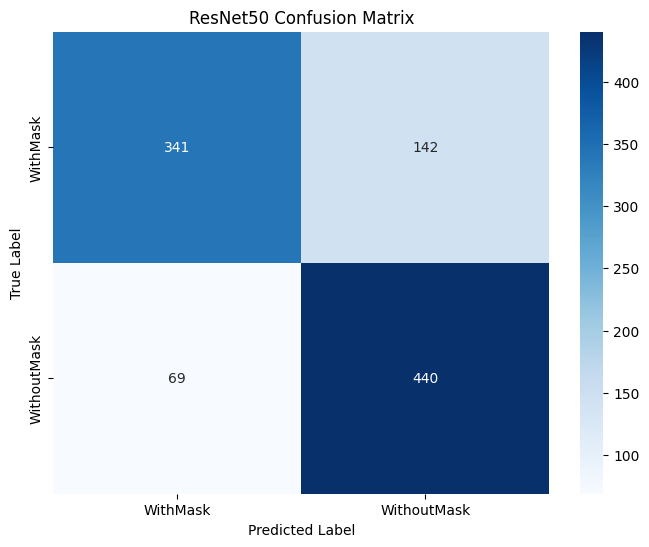

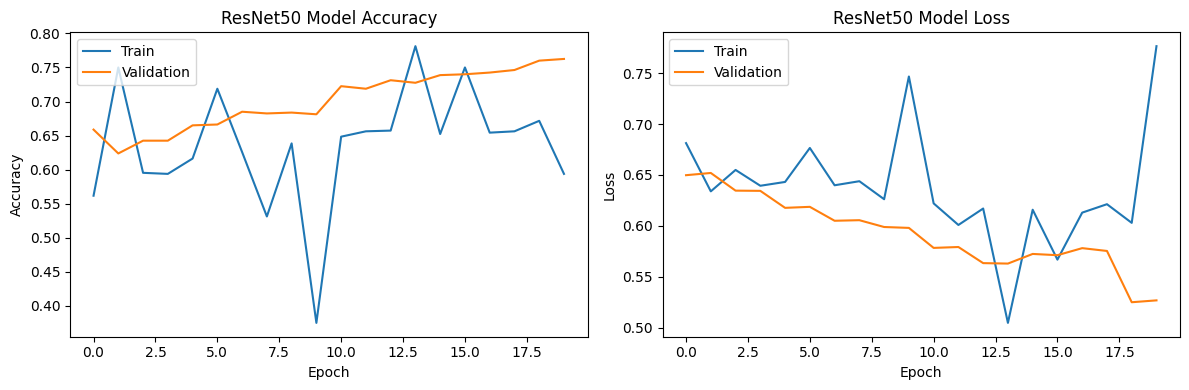


--- Training and Evaluating InceptionV3 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for InceptionV3...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.9498 - loss: 0.1225

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 254s 751ms/step - accuracy: 0.9499 - loss: 0.1223 - val_accuracy: 0.9987 - val_loss: 0.0080
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0284

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.9987 - val_loss: 0.0077
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.9832 - loss: 0.0454

312/312 ━━━━━━━━━━━━━━━━━━━━ 228s 695ms/step - accuracy: 0.9832 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 1.0000 - loss: 0.0046

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.9904 - loss: 0.0299

312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 696ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0079

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.9937 - loss: 0.0207

312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 694ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 1.0000 - val_loss: 8.0351e-04
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 1.0000 - loss: 0.0023

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.0600e-04
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 695ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 1.0000 - loss: 0.0235

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 695ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9987 - val_loss: 0.0019
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0014

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9987 - val_loss: 0.0021
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 213s 682ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9987 - val_loss: 0.0029
InceptionV3 training finished in 1587.05 seconds.

Evaluating InceptionV3 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9948 - loss: 0.0120
InceptionV3 Test Loss: 0.0080, Test Accuracy: 0.9960
InceptionV3 testing finished in 4.17 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step

InceptionV3 Classification Report:
              precision    recall  f1-score   support

    WithMask       1.00      0.99      1.00       483
 WithoutMask       0.99      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992


InceptionV3 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


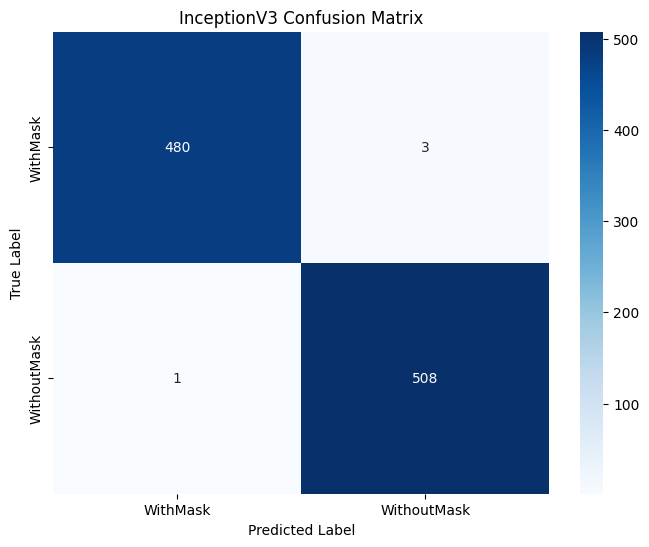

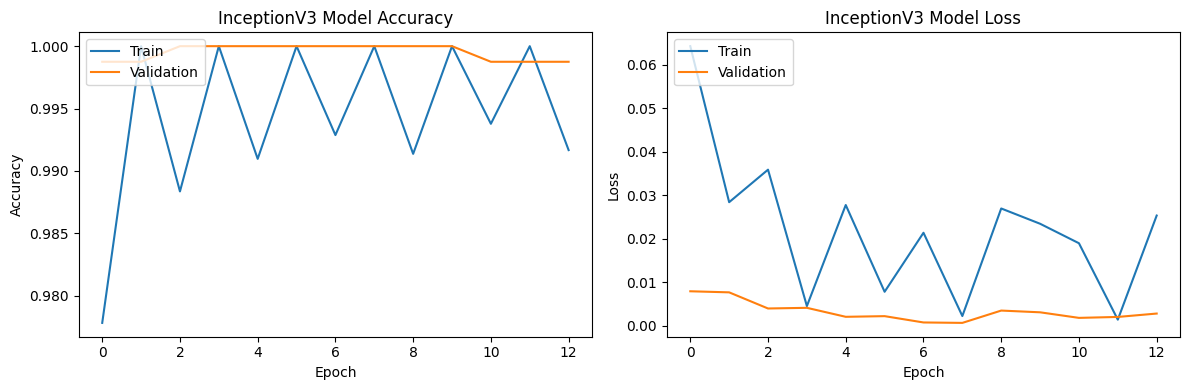



--- Overall Performance Summary ---

Model: VGG16
  Test Accuracy: 0.9869
  Test Loss: 0.0381
  Training Time: 1745.31 seconds
  Testing Time: 10.32 seconds
  Precision (WithMask): 0.9816
  Recall (WithMask): 0.9917
  F1-score (WithMask): 0.9866
  Precision (WithoutMask): 0.9921
  Recall (WithoutMask): 0.9823
  F1-score (WithoutMask): 0.9872

Model: ResNet50
  Test Accuracy: 0.7873
  Test Loss: 0.5108
  Training Time: 1451.47 seconds
  Testing Time: 5.27 seconds
  Precision (WithMask): 0.8317
  Recall (WithMask): 0.7060
  F1-score (WithMask): 0.7637
  Precision (WithoutMask): 0.7560
  Recall (WithoutMask): 0.8644
  F1-score (WithoutMask): 0.8066

Model: InceptionV3
  Test Accuracy: 0.9960
  Test Loss: 0.0080
  Training Time: 1587.05 seconds
  Testing Time: 4.17 seconds
  Precision (WithMask): 0.9979
  Recall (WithMask): 0.9938
  F1-score (WithMask): 0.9959
  Precision (WithoutMask): 0.9941
  Recall (WithoutMask): 0.9980
  F1-score (WithoutMask): 0.9961


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 20  # Can be adjusted, early stopping will prevent overfitting
NUM_CLASSES = 2 # 'WithMask', 'WithoutMask'
DATASET_DIR = '/content/face_mask_12k/Face Mask Dataset/'
TRAIN_DIR = os.path.join(DATASET_DIR, 'Train')
TEST_DIR = os.path.join(DATASET_DIR, 'Test')
VALIDATION_DIR = os.path.join(DATASET_DIR, 'Validation')

# --- Data Augmentation and Preprocessing ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# --- Model Training and Evaluation Function ---
def train_and_evaluate_model(model_name, base_model_instance, input_shape, epochs=EPOCHS):
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Create the model
    input_tensor = Input(shape=input_shape) # Use the correct input shape for the specific model
    x = base_model_instance(input_tensor)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Use 'sigmoid' for binary classification, 'softmax' for multi-class
    outputs = Dense(NUM_CLASSES - 1 if NUM_CLASSES == 2 else NUM_CLASSES, activation='sigmoid' if NUM_CLASSES == 2 else 'softmax')(x)
    model = Model(inputs=input_tensor, outputs=outputs)

    # Freeze the base model layers initially
    for layer in base_model_instance.layers:
        layer.trainable = False

    # Compile the model

    model.compile(optimizer='adam',
                  loss='binary_crossentropy' if NUM_CLASSES == 2 else 'categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'{model_name}_best_model.h5', monitor='val_loss', save_best_only=True)

    # Determine the appropriate generators based on input shape
    if input_shape[0] == 299:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )
    else:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )


    # Train the model
    print(f"Starting training for {model_name}...")
    start_time = time.time()
    history = model.fit(
        current_train_generator,
        steps_per_epoch=current_train_generator.samples // BATCH_SIZE,
        epochs=epochs,
        validation_data=current_validation_generator,
        validation_steps=current_validation_generator.samples // BATCH_SIZE,
        callbacks=[early_stopping, model_checkpoint]
    )
    train_time = time.time() - start_time
    print(f"{model_name} training finished in {train_time:.2f} seconds.")

    # Load best weights
    model.load_weights(f'{model_name}_best_model.h5')

    # Evaluate the model on the test set
    print(f"\nEvaluating {model_name} on the test set...")
    start_time = time.time()
    loss, accuracy = model.evaluate(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE)
    test_time = time.time() - start_time
    print(f"{model_name} Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} testing finished in {test_time:.2f} seconds.")


    # Get predictions
    current_test_generator.reset() # Reset generator to ensure correct order
    predictions = model.predict(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE + 1)

    # Convert predictions to class labels (for binary: round, for multi-class: argmax)
    if NUM_CLASSES == 2:
        predicted_classes = (predictions > 0.5).astype(int)
    else:
        predicted_classes = np.argmax(predictions, axis=1)

    true_classes = current_test_generator.classes
    class_labels = list(current_test_generator.class_indices.keys())

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'test_accuracy': accuracy,
        'test_loss': loss,
        'train_time': train_time,
        'test_time': test_time,
        'classification_report': classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True),
        'confusion_matrix': cm.tolist()
    }

# --- Define Transfer Learning Models ---
# Note: You might need to adjust the input shape if the base model requires it.
# Most common are (224, 224, 3) and (299, 299, 3). VGG16 and ResNet50 use 224. InceptionV3 uses 299.

models_to_train = [
    {'name': 'VGG16', 'base_model_class': VGG16, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'ResNet50', 'base_model_class': ResNet50, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'InceptionV3', 'base_model_class': InceptionV3, 'input_shape': (299, 299, 3)}, # InceptionV3 usually uses 299x299
]


# --- Run Training and Evaluation for Each Model ---
results = []

for model_info in models_to_train:
    name = model_info['name']
    base_model_class = model_info['base_model_class']
    input_shape = model_info['input_shape']

    # Instantiate the base model before passing it to the function
    # Note: Base model expects tuple for input_shape argument
    base_model_instance = base_model_class(input_shape=input_shape, weights='imagenet', include_top=False)


    # Train and evaluate
    result = train_and_evaluate_model(
        model_name=name,
        base_model_instance=base_model_instance, # Pass the instantiated model
        input_shape=input_shape,
        epochs=EPOCHS # Pass adjusted epochs if needed per model
    )
    results.append(result)


# --- Summary of Results ---
print("\n\n--- Overall Performance Summary ---")
for res in results:
    print(f"\nModel: {res['model_name']}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Training Time: {res['train_time']:.2f} seconds")
    print(f"  Testing Time: {res['test_time']:.2f} seconds")
    # You can print more metrics from the classification_report dictionary if needed
    print(f"  Precision (WithMask): {res['classification_report']['WithMask']['precision']:.4f}")
    print(f"  Recall (WithMask): {res['classification_report']['WithMask']['recall']:.4f}")
    print(f"  F1-score (WithMask): {res['classification_report']['WithMask']['f1-score']:.4f}")
    print(f"  Precision (WithoutMask): {res['classification_report']['WithoutMask']['precision']:.4f}")
    print(f"  Recall (WithoutMask): {res['classification_report']['WithoutMask']['recall']:.4f}")
    print(f"  F1-score (WithoutMask): {res['classification_report']['WithoutMask']['f1-score']:.4f}")


--- Training and Evaluating VGG16 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8186 - loss: 0.4042

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 145s 456ms/step - accuracy: 0.8189 - loss: 0.4038 - val_accuracy: 0.9563 - val_loss: 0.1251
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 0.9688 - loss: 0.1920

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9688 - loss: 0.1920 - val_accuracy: 0.9563 - val_loss: 0.1243
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9517 - loss: 0.1432

312/312 ━━━━━━━━━━━━━━━━━━━━ 194s 448ms/step - accuracy: 0.9517 - loss: 0.1432 - val_accuracy: 0.9613 - val_loss: 0.1030
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 154ms/step - accuracy: 1.0000 - loss: 0.0599

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 1.0000 - loss: 0.0599 - val_accuracy: 0.9625 - val_loss: 0.1026
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9584 - loss: 0.1116

312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 449ms/step - accuracy: 0.9584 - loss: 0.1116 - val_accuracy: 0.9737 - val_loss: 0.0713
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 1.0000 - loss: 0.0324

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 1.0000 - loss: 0.0324 - val_accuracy: 0.9712 - val_loss: 0.0703
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9634 - loss: 0.1005

312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 446ms/step - accuracy: 0.9635 - loss: 0.1005 - val_accuracy: 0.9762 - val_loss: 0.0629
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 1.0000 - loss: 0.0337

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0337 - val_accuracy: 0.9762 - val_loss: 0.0617
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 197s 444ms/step - accuracy: 0.9657 - loss: 0.0861 - val_accuracy: 0.9712 - val_loss: 0.0750
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - accuracy: 1.0000 - loss: 0.0532

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0532 - val_accuracy: 0.9725 - val_loss: 0.0740
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9716 - loss: 0.0846

312/312 ━━━━━━━━━━━━━━━━━━━━ 138s 443ms/step - accuracy: 0.9716 - loss: 0.0846 - val_accuracy: 0.9862 - val_loss: 0.0457
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 0.9688 - loss: 0.0883

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9688 - loss: 0.0883 - val_accuracy: 0.9850 - val_loss: 0.0431
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.9763 - loss: 0.0716

312/312 ━━━━━━━━━━━━━━━━━━━━ 205s 467ms/step - accuracy: 0.9763 - loss: 0.0716 - val_accuracy: 0.9875 - val_loss: 0.0417
Epoch 14/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.9062 - loss: 0.1538

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9062 - loss: 0.1538 - val_accuracy: 0.9887 - val_loss: 0.0396
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 142s 456ms/step - accuracy: 0.9757 - loss: 0.0705 - val_accuracy: 0.9700 - val_loss: 0.0700
Epoch 16/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 46s 151ms/step - accuracy: 1.0000 - loss: 0.0256

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.9725 - val_loss: 0.0621
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9791 - loss: 0.0634

312/312 ━━━━━━━━━━━━━━━━━━━━ 143s 459ms/step - accuracy: 0.9791 - loss: 0.0634 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 18/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 156ms/step - accuracy: 0.9062 - loss: 0.1329

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9062 - loss: 0.1329 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 141s 453ms/step - accuracy: 0.9753 - loss: 0.0669 - val_accuracy: 0.9850 - val_loss: 0.0413
Epoch 20/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 155ms/step - accuracy: 0.9688 - loss: 0.0747

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9688 - loss: 0.0747 - val_accuracy: 0.9850 - val_loss: 0.0434
VGG16 training finished in 1745.31 seconds.

Evaluating VGG16 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9888 - loss: 0.0360
VGG16 Test Loss: 0.0381, Test Accuracy: 0.9869
VGG16 testing finished in 10.32 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step

VGG16 Classification Report:
              precision    recall  f1-score   support

    WithMask       0.98      0.99      0.99       483
 WithoutMask       0.99      0.98      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992


VGG16 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


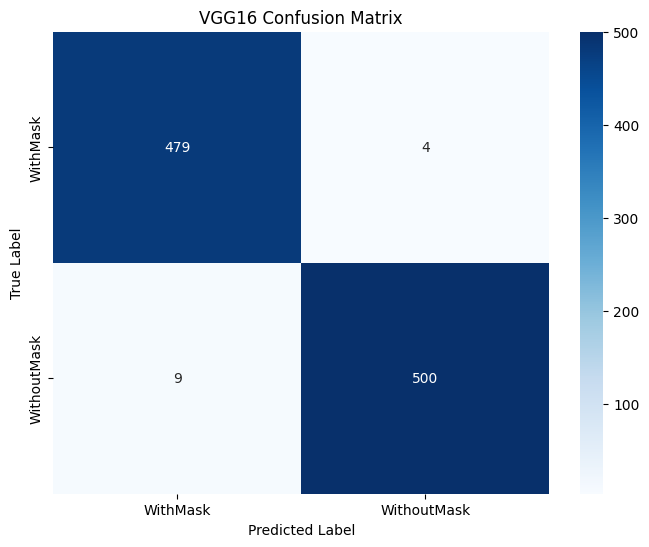

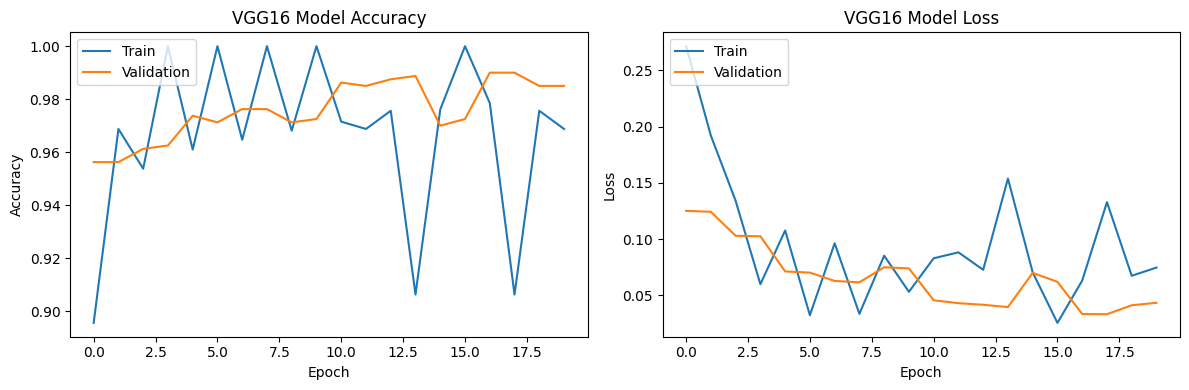


--- Training and Evaluating ResNet50 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for ResNet50...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5398 - loss: 0.7092

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 157s 471ms/step - accuracy: 0.5398 - loss: 0.7091 - val_accuracy: 0.6587 - val_loss: 0.6498
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 36s 119ms/step - accuracy: 0.7500 - loss: 0.6339

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.6339 - val_accuracy: 0.6237 - val_loss: 0.6520
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.5926 - loss: 0.6583

312/312 ━━━━━━━━━━━━━━━━━━━━ 180s 419ms/step - accuracy: 0.5926 - loss: 0.6583 - val_accuracy: 0.6425 - val_loss: 0.6346
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.5938 - loss: 0.6394

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5938 - loss: 0.6394 - val_accuracy: 0.6425 - val_loss: 0.6344
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6081 - loss: 0.6462

312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 420ms/step - accuracy: 0.6081 - loss: 0.6462 - val_accuracy: 0.6650 - val_loss: 0.6177
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.7188 - loss: 0.6765

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7188 - loss: 0.6765 - val_accuracy: 0.6662 - val_loss: 0.6187
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6207 - loss: 0.6452

312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 417ms/step - accuracy: 0.6207 - loss: 0.6452 - val_accuracy: 0.6850 - val_loss: 0.6050
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5312 - loss: 0.6439

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5312 - loss: 0.6439 - val_accuracy: 0.6825 - val_loss: 0.6056
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.6445 - loss: 0.6253

312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 419ms/step - accuracy: 0.6445 - loss: 0.6253 - val_accuracy: 0.6837 - val_loss: 0.5989
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.3750 - loss: 0.7468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3750 - loss: 0.7468 - val_accuracy: 0.6812 - val_loss: 0.5980
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6472 - loss: 0.6220

312/312 ━━━━━━━━━━━━━━━━━━━━ 131s 420ms/step - accuracy: 0.6472 - loss: 0.6220 - val_accuracy: 0.7225 - val_loss: 0.5783
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.6562 - loss: 0.6009

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6562 - loss: 0.6009 - val_accuracy: 0.7188 - val_loss: 0.5792
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.6552 - loss: 0.6164

312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 420ms/step - accuracy: 0.6552 - loss: 0.6164 - val_accuracy: 0.7312 - val_loss: 0.5634
Epoch 14/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.7812 - loss: 0.5046

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7812 - loss: 0.5046 - val_accuracy: 0.7275 - val_loss: 0.5629
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 130s 416ms/step - accuracy: 0.6569 - loss: 0.6158 - val_accuracy: 0.7387 - val_loss: 0.5724
Epoch 16/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.7500 - loss: 0.5668

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.5668 - val_accuracy: 0.7400 - val_loss: 0.5712
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 139s 414ms/step - accuracy: 0.6531 - loss: 0.6099 - val_accuracy: 0.7425 - val_loss: 0.5781
Epoch 18/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.6562 - loss: 0.6213

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6562 - loss: 0.6213 - val_accuracy: 0.7462 - val_loss: 0.5753
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.6686 - loss: 0.6060

312/312 ━━━━━━━━━━━━━━━━━━━━ 130s 415ms/step - accuracy: 0.6687 - loss: 0.6060 - val_accuracy: 0.7600 - val_loss: 0.5249
Epoch 20/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.5938 - loss: 0.7766

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5938 - loss: 0.7766 - val_accuracy: 0.7625 - val_loss: 0.5268
ResNet50 training finished in 1451.47 seconds.

Evaluating ResNet50 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.7355 - loss: 0.4930
ResNet50 Test Loss: 0.5108, Test Accuracy: 0.7873
ResNet50 testing finished in 5.27 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



ResNet50 Classification Report:
              precision    recall  f1-score   support

    WithMask       0.83      0.71      0.76       483
 WithoutMask       0.76      0.86      0.81       509

    accuracy                           0.79       992
   macro avg       0.79      0.79      0.79       992
weighted avg       0.79      0.79      0.79       992


ResNet50 Confusion Matrix:


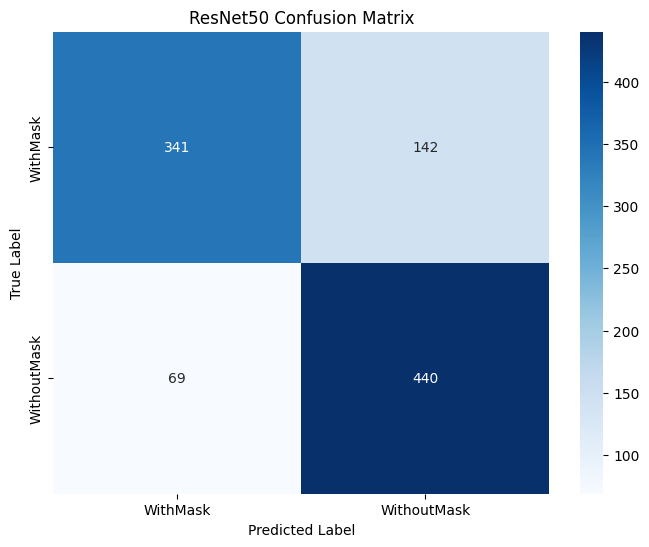

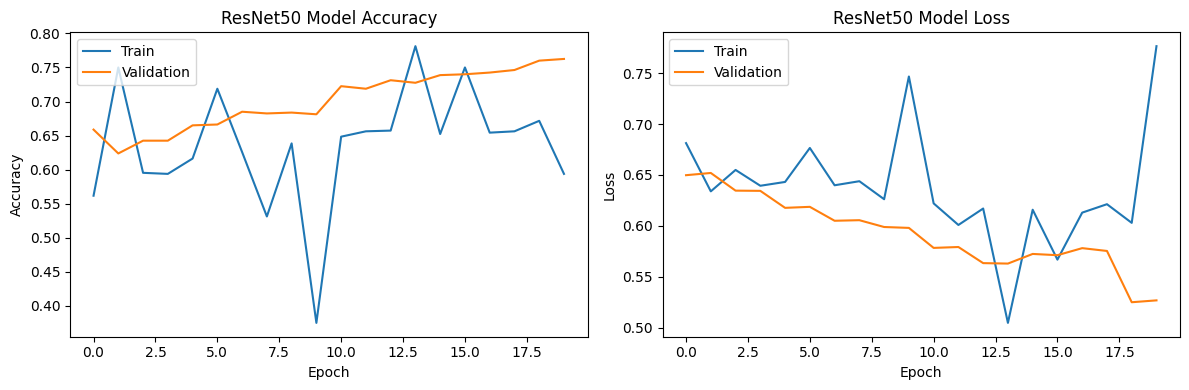


--- Training and Evaluating InceptionV3 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for InceptionV3...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.9498 - loss: 0.1225

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 254s 751ms/step - accuracy: 0.9499 - loss: 0.1223 - val_accuracy: 0.9987 - val_loss: 0.0080
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0284

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.9987 - val_loss: 0.0077
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.9832 - loss: 0.0454

312/312 ━━━━━━━━━━━━━━━━━━━━ 228s 695ms/step - accuracy: 0.9832 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 1.0000 - loss: 0.0046

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.9904 - loss: 0.0299

312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 696ms/step - accuracy: 0.9904 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0079

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.9937 - loss: 0.0207

312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 694ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 1.0000 - val_loss: 8.0351e-04
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 1.0000 - loss: 0.0023

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 7.0600e-04
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 695ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 1.0000 - loss: 0.0235

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 217s 695ms/step - accuracy: 0.9946 - loss: 0.0170 - val_accuracy: 0.9987 - val_loss: 0.0019
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 33s 108ms/step - accuracy: 1.0000 - loss: 0.0014

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9987 - val_loss: 0.0021
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 213s 682ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9987 - val_loss: 0.0029
InceptionV3 training finished in 1587.05 seconds.

Evaluating InceptionV3 on the test set...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.9948 - loss: 0.0120
InceptionV3 Test Loss: 0.0080, Test Accuracy: 0.9960
InceptionV3 testing finished in 4.17 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step

InceptionV3 Classification Report:
              precision    recall  f1-score   support

    WithMask       1.00      0.99      1.00       483
 WithoutMask       0.99      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992


InceptionV3 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


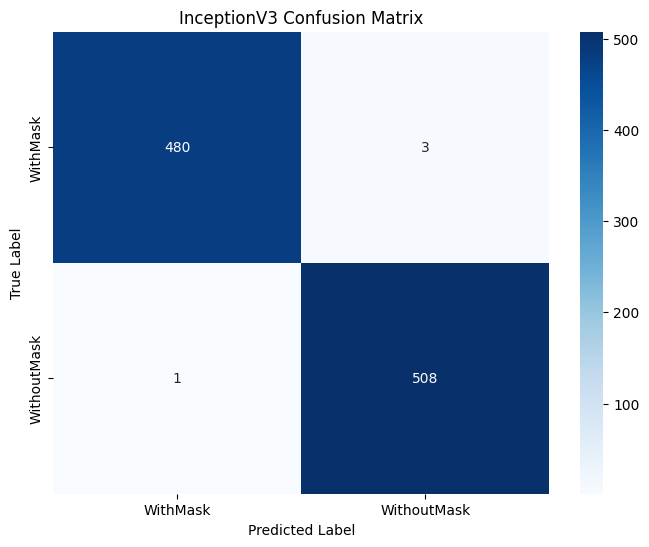

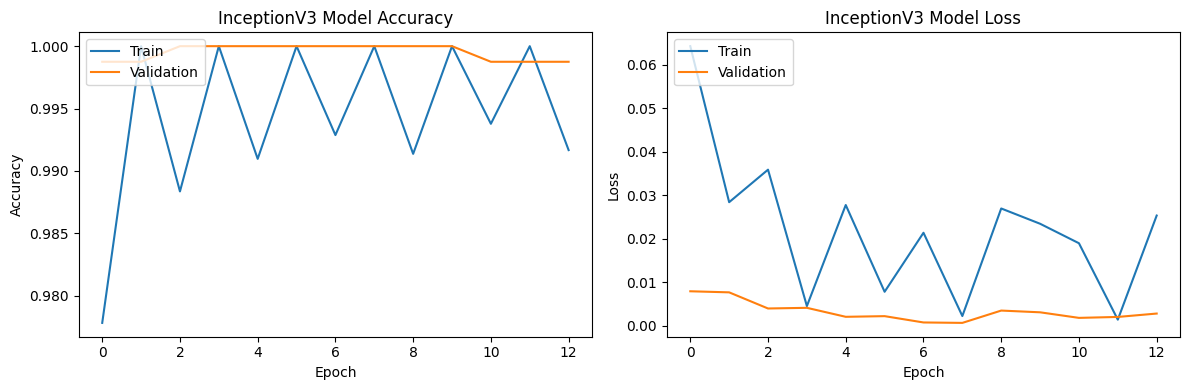



--- Overall Performance Summary ---

Model: VGG16
  Test Accuracy: 0.9869
  Test Loss: 0.0381
  Training Time: 1745.31 seconds
  Testing Time: 10.32 seconds
  Precision (WithMask): 0.9816
  Recall (WithMask): 0.9917
  F1-score (WithMask): 0.9866
  Precision (WithoutMask): 0.9921
  Recall (WithoutMask): 0.9823
  F1-score (WithoutMask): 0.9872

Model: ResNet50
  Test Accuracy: 0.7873
  Test Loss: 0.5108
  Training Time: 1451.47 seconds
  Testing Time: 5.27 seconds
  Precision (WithMask): 0.8317
  Recall (WithMask): 0.7060
  F1-score (WithMask): 0.7637
  Precision (WithoutMask): 0.7560
  Recall (WithoutMask): 0.8644
  F1-score (WithoutMask): 0.8066

Model: InceptionV3
  Test Accuracy: 0.9960
  Test Loss: 0.0080
  Training Time: 1587.05 seconds
  Testing Time: 4.17 seconds
  Precision (WithMask): 0.9979
  Recall (WithMask): 0.9938
  F1-score (WithMask): 0.9959
  Precision (WithoutMask): 0.9941
  Recall (WithoutMask): 0.9980
  F1-score (WithoutMask): 0.9961


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 20  # Can be adjusted, early stopping will prevent overfitting
NUM_CLASSES = 2 # 'WithMask', 'WithoutMask'
DATASET_DIR = '/content/face_mask_12k/Face Mask Dataset/'
TRAIN_DIR = os.path.join(DATASET_DIR, 'Train')
TEST_DIR = os.path.join(DATASET_DIR, 'Test')
VALIDATION_DIR = os.path.join(DATASET_DIR, 'Validation')

# --- Data Augmentation and Preprocessing ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# --- Model Training and Evaluation Function ---
def train_and_evaluate_model(model_name, base_model_instance, input_shape, epochs=EPOCHS):
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Create the model
    input_tensor = Input(shape=input_shape) # Use the correct input shape for the specific model
    x = base_model_instance(input_tensor)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Use 'sigmoid' for binary classification, 'softmax' for multi-class
    outputs = Dense(NUM_CLASSES - 1 if NUM_CLASSES == 2 else NUM_CLASSES, activation='sigmoid' if NUM_CLASSES == 2 else 'softmax')(x)
    model = Model(inputs=input_tensor, outputs=outputs)

    # Freeze the base model layers initially
    for layer in base_model_instance.layers:
        layer.trainable = False

    # Compile the model

    model.compile(optimizer='adam',
                  loss='binary_crossentropy' if NUM_CLASSES == 2 else 'categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'{model_name}_best_model.h5', monitor='val_loss', save_best_only=True)

    # Determine the appropriate generators based on input shape
    if input_shape[0] == 299:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )
    else:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )


    # Train the model
    print(f"Starting training for {model_name}...")
    start_time = time.time()
    history = model.fit(
        current_train_generator,
        steps_per_epoch=current_train_generator.samples // BATCH_SIZE,
        epochs=epochs,
        validation_data=current_validation_generator,
        validation_steps=current_validation_generator.samples // BATCH_SIZE,
        callbacks=[early_stopping, model_checkpoint]
    )
    train_time = time.time() - start_time
    print(f"{model_name} training finished in {train_time:.2f} seconds.")

    # Load best weights
    model.load_weights(f'{model_name}_best_model.h5')

    # Evaluate the model on the test set
    print(f"\nEvaluating {model_name} on the test set...")
    start_time = time.time()
    loss, accuracy = model.evaluate(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE)
    test_time = time.time() - start_time
    print(f"{model_name} Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} testing finished in {test_time:.2f} seconds.")


    # Get predictions
    current_test_generator.reset() # Reset generator to ensure correct order
    predictions = model.predict(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE + 1)

    # Convert predictions to class labels (for binary: round, for multi-class: argmax)
    if NUM_CLASSES == 2:
        predicted_classes = (predictions > 0.5).astype(int)
    else:
        predicted_classes = np.argmax(predictions, axis=1)

    true_classes = current_test_generator.classes
    class_labels = list(current_test_generator.class_indices.keys())

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'test_accuracy': accuracy,
        'test_loss': loss,
        'train_time': train_time,
        'test_time': test_time,
        'classification_report': classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True),
        'confusion_matrix': cm.tolist()
    }

# --- Define Transfer Learning Models ---
# Note: You might need to adjust the input shape if the base model requires it.
# Most common are (224, 224, 3) and (299, 299, 3). VGG16 and ResNet50 use 224. InceptionV3 uses 299.

models_to_train = [
    {'name': 'VGG16', 'base_model_class': VGG16, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'ResNet50', 'base_model_class': ResNet50, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'InceptionV3', 'base_model_class': InceptionV3, 'input_shape': (299, 299, 3)}, # InceptionV3 usually uses 299x299
]


# --- Run Training and Evaluation for Each Model ---
results = []

for model_info in models_to_train:
    name = model_info['name']
    base_model_class = model_info['base_model_class']
    input_shape = model_info['input_shape']

    # Instantiate the base model before passing it to the function
    # Note: Base model expects tuple for input_shape argument
    base_model_instance = base_model_class(input_shape=input_shape, weights='imagenet', include_top=False)


    # Train and evaluate
    result = train_and_evaluate_model(
        model_name=name,
        base_model_instance=base_model_instance, # Pass the instantiated model
        input_shape=input_shape,
        epochs=EPOCHS # Pass adjusted epochs if needed per model
    )
    results.append(result)


# --- Summary of Results ---
print("\n\n--- Overall Performance Summary ---")
for res in results:
    print(f"\nModel: {res['model_name']}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Training Time: {res['train_time']:.2f} seconds")
    print(f"  Testing Time: {res['test_time']:.2f} seconds")
    # You can print more metrics from the classification_report dictionary if needed
    print(f"  Precision (WithMask): {res['classification_report']['WithMask']['precision']:.4f}")
    print(f"  Recall (WithMask): {res['classification_report']['WithMask']['recall']:.4f}")
    print(f"  F1-score (WithMask): {res['classification_report']['WithMask']['f1-score']:.4f}")
    print(f"  Precision (WithoutMask): {res['classification_report']['WithoutMask']['precision']:.4f}")
    print(f"  Recall (WithoutMask): {res['classification_report']['WithoutMask']['recall']:.4f}")
    print(f"  F1-score (WithoutMask): {res['classification_report']['WithoutMask']['f1-score']:.4f}")

## **CNN Model**


--- Training Custom CNN (WithAug) ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 434ms/step - accuracy: 0.8489 - loss: 0.3582 - val_accuracy: 0.9663 - val_loss: 0.1021
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 388ms/step - accuracy: 0.9295 - loss: 0.1923 - val_accuracy: 0.9575 - val_loss: 0.1064
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 398ms/step - accuracy: 0.9392 - loss: 0.1712 - val_accuracy: 0.9575 - val_loss: 0.1325
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 394ms/step - accuracy: 0.9425 - loss: 0.1597 - val_accuracy: 0.9688 - val_loss: 0.0973
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 392ms/step - accuracy: 0.9527 - loss: 0.1355 - val_accuracy: 0.9812 - val_loss: 0.0603
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 395ms/step - accuracy: 0.9517 - loss: 0.1356 - val_accuracy: 0.9812 - val_loss: 0.0564
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 390ms/step - accuracy: 0.9615 - loss: 0.1152 - val_accuracy: 0.9862 - val_loss: 0.0475
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 395ms/step - accuracy: 0.9679 -

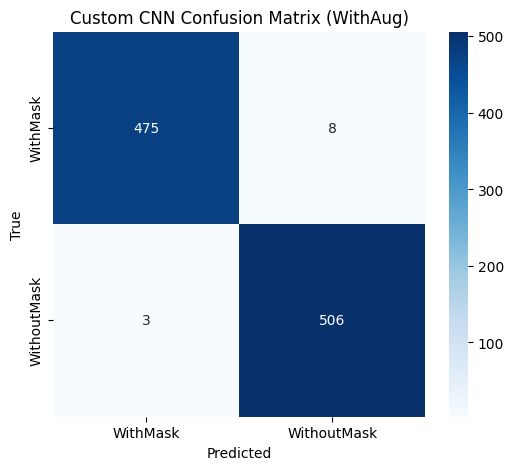

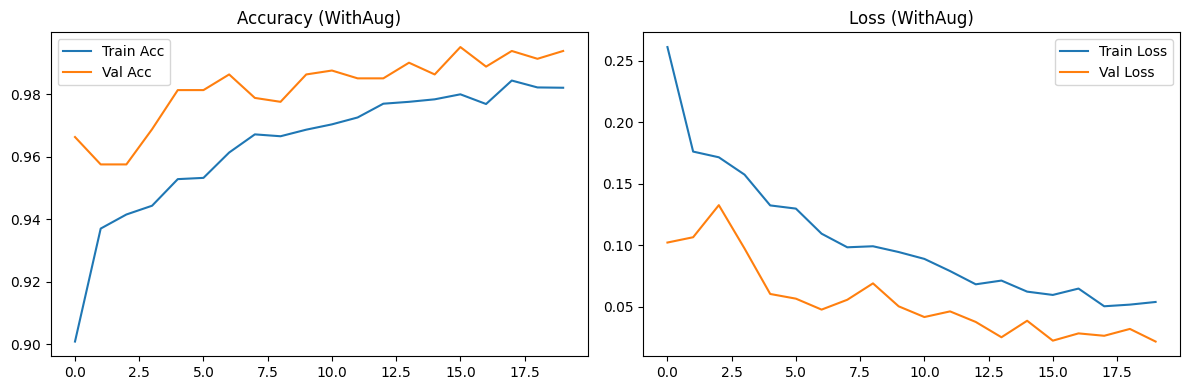


--- Training Custom CNN (NoAug) ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.9056 - loss: 0.2599 - val_accuracy: 0.9900 - val_loss: 0.0727
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9803 - loss: 0.0584 - val_accuracy: 0.9925 - val_loss: 0.0217
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.9866 - loss: 0.0387 - val_accuracy: 0.9962 - val_loss: 0.0205
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9876 - loss: 0.0346 - val_accuracy: 0.9950 - val_loss: 0.0167
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9875 - val_loss: 0.0398
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9923 - loss: 0.0190 - val_accuracy: 0.9912 - val_loss: 0.0190
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9962 - val_loss: 0.0138
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accurac

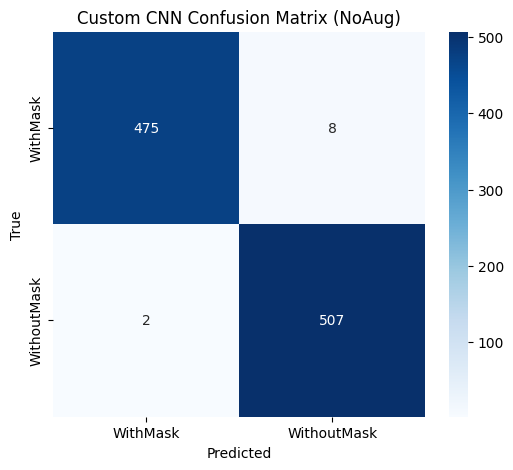

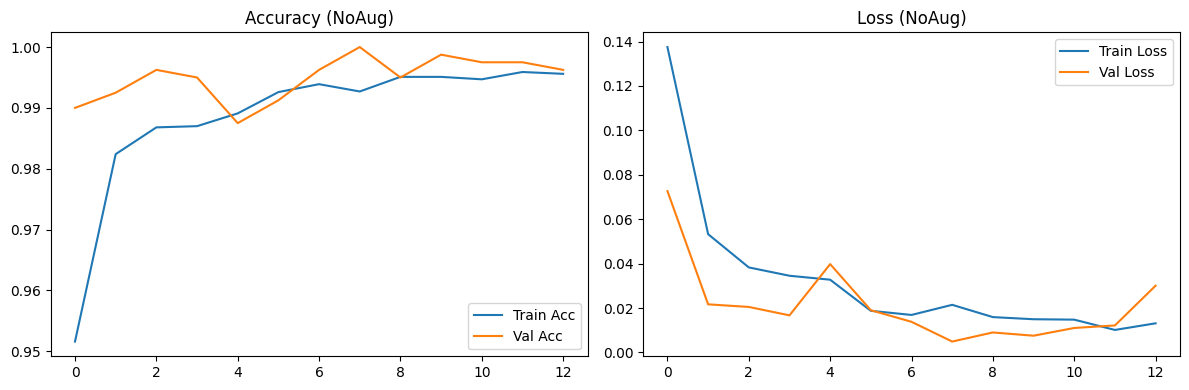


--- Custom CNN Comparison Summary ---

With Augmentation
Test Accuracy: 0.9889
Test Loss: 0.0302
Training Time: 2473.66 seconds

No Augmentation
Test Accuracy: 0.9899
Test Loss: 0.0281
Training Time: 317.43 seconds


In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 20
DATASET_DIR = '/content/face_mask_12k/Face Mask Dataset/'
TRAIN_DIR = os.path.join(DATASET_DIR, 'Train')
TEST_DIR = os.path.join(DATASET_DIR, 'Test')
VALIDATION_DIR = os.path.join(DATASET_DIR, 'Validation')

# --- Data Generators ---
augment_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

noaugment_datagen = ImageDataGenerator(rescale=1./255)

# Function to load data
def load_generators(augmented):
    datagen = augment_datagen if augmented else noaugment_datagen

    train_generator = datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    val_generator = noaugment_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    test_generator = noaugment_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )

    return train_generator, val_generator, test_generator

# --- Custom CNN Model ---
def create_custom_cnn(input_shape=(224, 224, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Train and Evaluate Function ---
def train_custom_model(use_augmentation):
    suffix = "WithAug" if use_augmentation else "NoAug"
    print(f"\n--- Training Custom CNN ({suffix}) ---")

    train_gen, val_gen, test_gen = load_generators(augmented=use_augmentation)

    model = create_custom_cnn()

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=val_gen,
        callbacks=[early_stopping]
    )
    train_time = time.time() - start_time
    print(f"Training time: {train_time:.2f} seconds")

    # Evaluation
    test_loss, test_acc = model.evaluate(test_gen)
    print(f"Test Accuracy ({suffix}): {test_acc:.4f}")
    print(f"Test Loss ({suffix}): {test_loss:.4f}")

    # Classification Report
    test_gen.reset()
    predictions = model.predict(test_gen)
    predicted_classes = (predictions > 0.5).astype(int)
    true_classes = test_gen.classes
    class_labels = list(test_gen.class_indices.keys())

    print(f"\nClassification Report ({suffix}):")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Custom CNN Confusion Matrix ({suffix})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Accuracy/Loss Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy ({suffix})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss ({suffix})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        'augmentation': use_augmentation,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'train_time': train_time,
        'confusion_matrix': cm.tolist()
    }

# --- Run Both Experiments ---
results_aug = train_custom_model(use_augmentation=True)
results_noaug = train_custom_model(use_augmentation=False)

# --- Print Summary ---
print("\n--- Custom CNN Comparison Summary ---")
for res in [results_aug, results_noaug]:
    label = "With Augmentation" if res['augmentation'] else "No Augmentation"
    print(f"\n{label}")
    print(f"Test Accuracy: {res['test_accuracy']:.4f}")
    print(f"Test Loss: {res['test_loss']:.4f}")
    print(f"Training Time: {res['train_time']:.2f} seconds")


## **No augmentation**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Training and Evaluating VGG16 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for VGG16_no Augmentation...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8399 - loss: 0.3637

312/312 ━━━━━━━━━━━━━━━━━━━━ 76s 205ms/step - accuracy: 0.8402 - loss: 0.3632 - val_accuracy: 0.9575 - val_loss: 0.1175
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 157ms/step - accuracy: 1.0000 - loss: 0.0245

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 1.0000 - loss: 0.0245 - val_accuracy: 0.9588 - val_loss: 0.1165
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9714 - loss: 0.0884

312/312 ━━━━━━━━━━━━━━━━━━━━ 61s 187ms/step - accuracy: 0.9714 - loss: 0.0884 - val_accuracy: 0.9650 - val_loss: 0.0857
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 48s 157ms/step - accuracy: 1.0000 - loss: 0.0224

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 1.0000 - loss: 0.0224 - val_accuracy: 0.9663 - val_loss: 0.0849
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9776 - loss: 0.0661

312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 186ms/step - accuracy: 0.9776 - loss: 0.0661 - val_accuracy: 0.9750 - val_loss: 0.0638
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 159ms/step - accuracy: 1.0000 - loss: 0.0154

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.9750 - val_loss: 0.0637
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9836 - loss: 0.0515

312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9836 - loss: 0.0515 - val_accuracy: 0.9775 - val_loss: 0.0527
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 159ms/step - accuracy: 1.0000 - loss: 0.0094

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.9762 - val_loss: 0.0526
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9803 - loss: 0.0513

312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.9803 - loss: 0.0513 - val_accuracy: 0.9800 - val_loss: 0.0521
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 159ms/step - accuracy: 0.9688 - loss: 0.0359

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9688 - loss: 0.0359 - val_accuracy: 0.9800 - val_loss: 0.0517
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9847 - loss: 0.0428

312/312 ━━━━━━━━━━━━━━━━━━━━ 58s 184ms/step - accuracy: 0.9847 - loss: 0.0428 - val_accuracy: 0.9812 - val_loss: 0.0416
Epoch 12/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9688 - loss: 0.0697 - val_accuracy: 0.9812 - val_loss: 0.0416
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 78s 187ms/step - accuracy: 0.9827 - loss: 0.0445 - val_accuracy: 0.9850 - val_loss: 0.0455
Epoch 14/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9688 - loss: 0.0432 - val_accuracy: 0.9837 - val_loss: 0.0446
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9875 - loss: 0.0330

312/312 ━━━━━━━━━━━━━━━━━━━━ 77s 187ms/step - accuracy: 0.9875 - loss: 0.0330 - val_accuracy: 0.9850 - val_loss: 0.0352
Epoch 16/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 49s 160ms/step - accuracy: 1.0000 - loss: 0.0185

312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.9837 - val_loss: 0.0351
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.9866 - loss: 0.0340 - val_accuracy: 0.9837 - val_loss: 0.0363
Epoch 18/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9688 - loss: 0.1285 - val_accuracy: 0.9850 - val_loss: 0.0407
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 188ms/step - accuracy: 0.9892 - loss: 0.0293 - val_accuracy: 0.9862 - val_loss: 0.0378
Epoch 20/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9375 - loss: 0.1087 - val_accuracy: 0.9875 - val_loss: 0.0353
VGG16 training finished in 706.78 seconds.

Evaluating VGG16 on the test set...
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9774 - loss: 0.0462
VGG16 Test Loss: 0.0342, Test Accuracy: 0.9849
VGG16 testing finished in 10.32 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step

VGG16 Classification Report:
              precision    recall  f1-score 

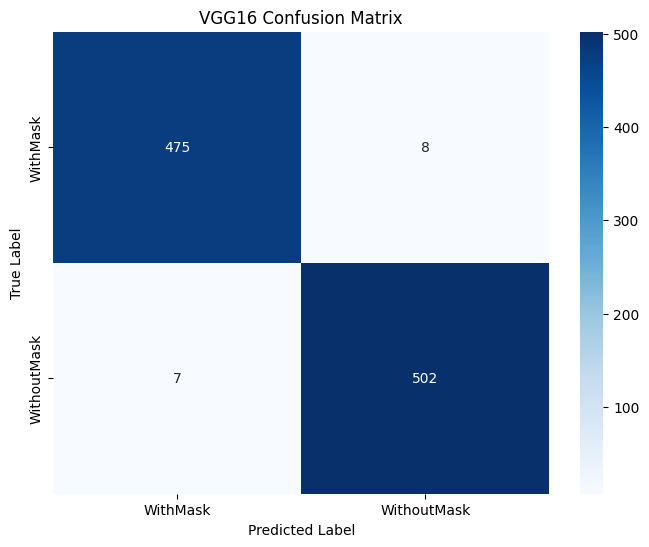

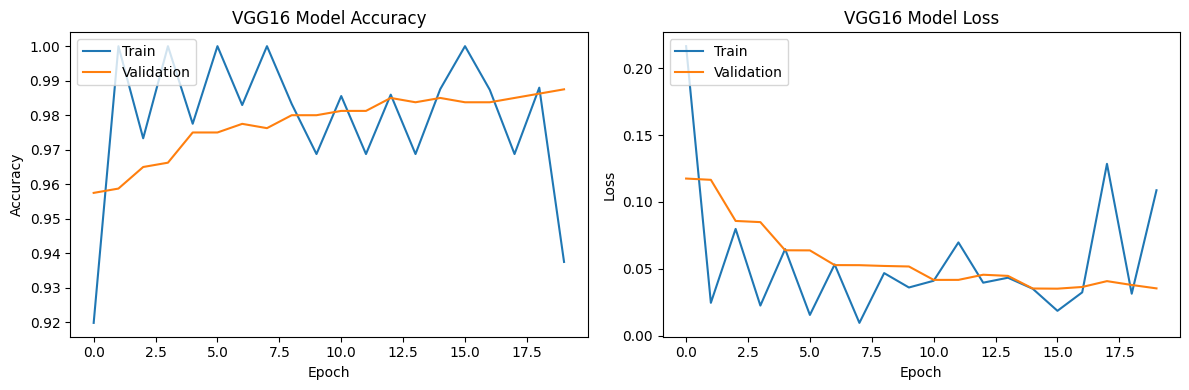

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Training and Evaluating ResNet50 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for ResNet50_no Augmentation...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5707 - loss: 0.6929

312/312 ━━━━━━━━━━━━━━━━━━━━ 51s 124ms/step - accuracy: 0.5708 - loss: 0.6928 - val_accuracy: 0.6950 - val_loss: 0.6007
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.6562 - loss: 0.5928

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6562 - loss: 0.5928 - val_accuracy: 0.6963 - val_loss: 0.6004
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6760 - loss: 0.6005

312/312 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.6760 - loss: 0.6004 - val_accuracy: 0.7275 - val_loss: 0.5692
Epoch 4/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.5625 - loss: 0.6956

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5625 - loss: 0.6956 - val_accuracy: 0.7450 - val_loss: 0.5616
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7219 - loss: 0.5528

312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7220 - loss: 0.5528 - val_accuracy: 0.7437 - val_loss: 0.5304
Epoch 6/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.5938 - loss: 0.6129

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5938 - loss: 0.6129 - val_accuracy: 0.8075 - val_loss: 0.4965
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7742 - loss: 0.4993

312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7743 - loss: 0.4992 - val_accuracy: 0.8375 - val_loss: 0.4256
Epoch 8/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.7812 - loss: 0.4077

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7812 - loss: 0.4077 - val_accuracy: 0.8462 - val_loss: 0.4209
Epoch 9/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8053 - loss: 0.4495

312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.8053 - loss: 0.4495 - val_accuracy: 0.8238 - val_loss: 0.4037
Epoch 10/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.7500 - loss: 0.4427

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7500 - loss: 0.4427 - val_accuracy: 0.8450 - val_loss: 0.3957
Epoch 11/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8171 - loss: 0.4223

312/312 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.8172 - loss: 0.4223 - val_accuracy: 0.8300 - val_loss: 0.3705
Epoch 12/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8750 - loss: 0.3542

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8750 - loss: 0.3542 - val_accuracy: 0.8425 - val_loss: 0.3656
Epoch 13/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8492 - loss: 0.3756

312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8492 - loss: 0.3756 - val_accuracy: 0.8888 - val_loss: 0.3112
Epoch 14/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9062 - loss: 0.3456 - val_accuracy: 0.8712 - val_loss: 0.3205
Epoch 15/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.8486 - loss: 0.3659 - val_accuracy: 0.8875 - val_loss: 0.3313
Epoch 16/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8438 - loss: 0.4643 - val_accuracy: 0.8763 - val_loss: 0.3468
Epoch 17/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8610 - loss: 0.3582

312/312 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.8610 - loss: 0.3582 - val_accuracy: 0.8988 - val_loss: 0.2948
Epoch 18/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8750 - loss: 0.3335 - val_accuracy: 0.9000 - val_loss: 0.2959
Epoch 19/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8598 - loss: 0.3521

312/312 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8598 - loss: 0.3521 - val_accuracy: 0.9000 - val_loss: 0.2920
Epoch 20/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.8750 - loss: 0.3260

312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8750 - loss: 0.3260 - val_accuracy: 0.8975 - val_loss: 0.2897
ResNet50 training finished in 407.13 seconds.

Evaluating ResNet50 on the test set...
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8828 - loss: 0.2802
ResNet50 Test Loss: 0.2684, Test Accuracy: 0.9163
ResNet50 testing finished in 3.02 seconds.
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step

ResNet50 Classification Report:
              precision    recall  f1-score   support

    WithMask       0.95      0.88      0.91       483
 WithoutMask       0.89      0.95      0.92       509

    accuracy                           0.92       992
   macro avg       0.92      0.92      0.92       992
weighted avg       0.92      0.92      0.92       992


ResNet50 Confusion Matrix:


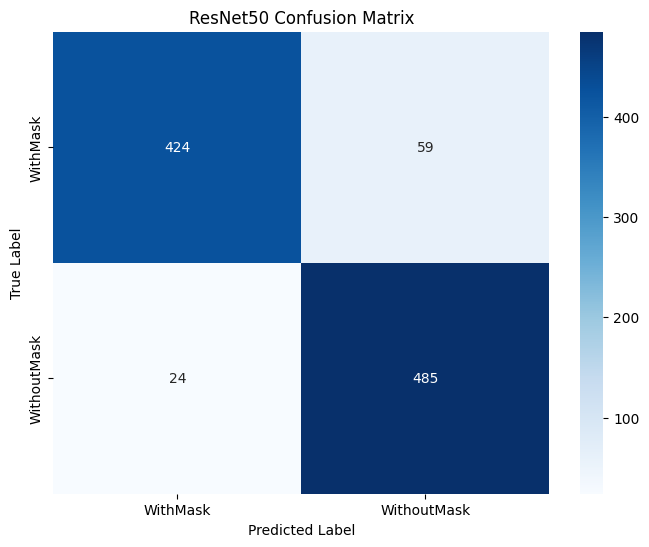

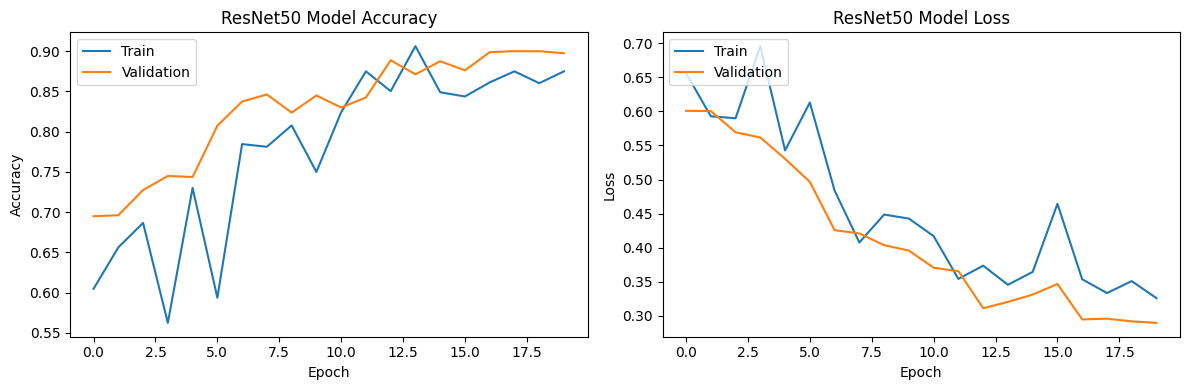

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Training and Evaluating InceptionV3 ---
Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Starting training for InceptionV3_no Augmentation...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9792 - loss: 0.0520

312/312 ━━━━━━━━━━━━━━━━━━━━ 80s 199ms/step - accuracy: 0.9792 - loss: 0.0519 - val_accuracy: 0.9987 - val_loss: 0.0030
Epoch 2/20
  1/312 ━━━━━━━━━━━━━━━━━━━━ 47s 154ms/step - accuracy: 0.9688 - loss: 0.0559

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9688 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9971 - loss: 0.0111

312/312 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9971 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 2.4721e-04
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 4.8418e-04 - val_accuracy: 1.0000 - val_loss: 2.8355e-04
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9966 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 2.8830e-04
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 8.9617e-05 - val_accuracy: 1.0000 - val_loss: 2.8968e-04
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9985 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 3.8588e-04
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 1.0000 - loss: 3.5106e-04 - val_accuracy: 1.0000 - val_loss: 3.6477e-04
InceptionV3 training finished in 221.16 seconds.

Evaluating InceptionV3 on the test set...
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9991 - loss: 0.0014
InceptionV3 Test Loss: 0.0026

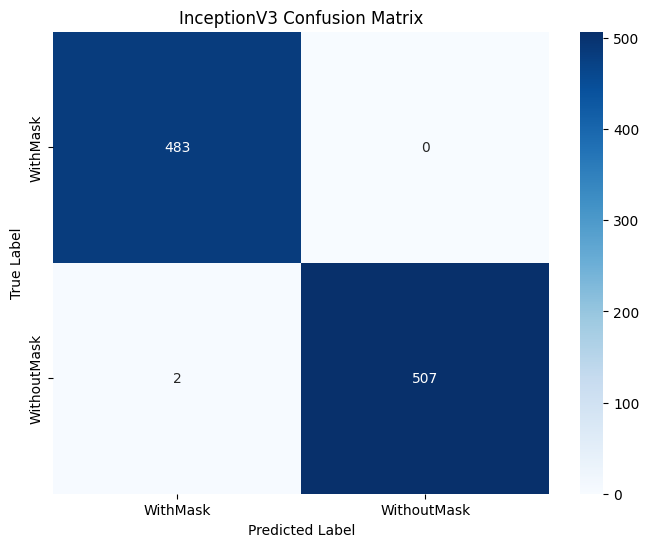

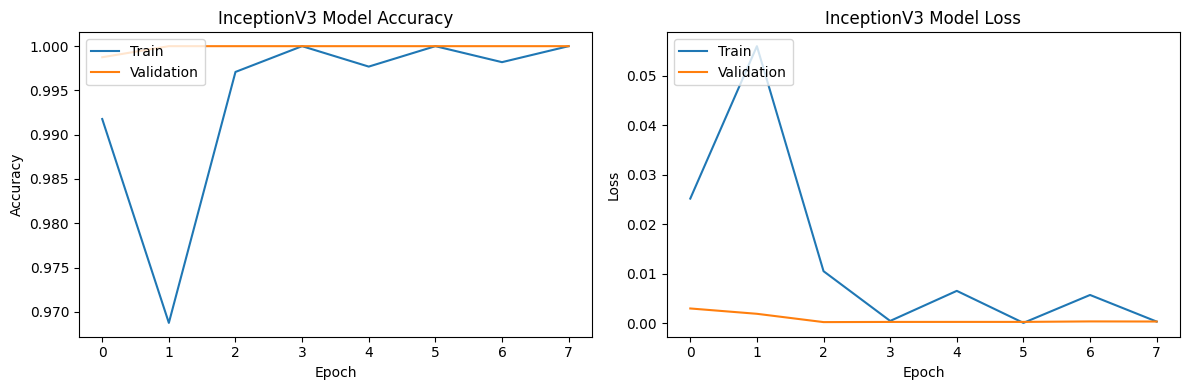



--- Overall Performance Summary ---

Model: VGG16
  Test Accuracy: 0.9849
  Test Loss: 0.0342
  Training Time: 706.78 seconds
  Testing Time: 10.32 seconds
  Precision (WithMask): 0.9855
  Recall (WithMask): 0.9834
  F1-score (WithMask): 0.9845
  Precision (WithoutMask): 0.9843
  Recall (WithoutMask): 0.9862
  F1-score (WithoutMask): 0.9853

Model: ResNet50
  Test Accuracy: 0.9163
  Test Loss: 0.2684
  Training Time: 407.13 seconds
  Testing Time: 3.02 seconds
  Precision (WithMask): 0.9464
  Recall (WithMask): 0.8778
  F1-score (WithMask): 0.9108
  Precision (WithoutMask): 0.8915
  Recall (WithoutMask): 0.9528
  F1-score (WithoutMask): 0.9212

Model: InceptionV3
  Test Accuracy: 0.9980
  Test Loss: 0.0026
  Training Time: 221.16 seconds
  Testing Time: 4.01 seconds
  Precision (WithMask): 0.9959
  Recall (WithMask): 1.0000
  F1-score (WithMask): 0.9979
  Precision (WithoutMask): 1.0000
  Recall (WithoutMask): 0.9961
  F1-score (WithoutMask): 0.9980


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from sklearn.metrics import classification_report, confusion_matrix
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuration ---
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 20  # Can be adjusted, early stopping will prevent overfitting
NUM_CLASSES = 2 # 'WithMask', 'WithoutMask'
DATASET_DIR = '/content/face_mask_12k/Face Mask Dataset/'
TRAIN_DIR = os.path.join(DATASET_DIR, 'Train')
TEST_DIR = os.path.join(DATASET_DIR, 'Test')
VALIDATION_DIR = os.path.join(DATASET_DIR, 'Validation')

# --- Data Augmentation and Preprocessing ---
train_datagen = ImageDataGenerator(
    rescale=1./255,

)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# --- Model Training and Evaluation Function ---
def train_and_evaluate_model(model_name, base_model_instance, input_shape, epochs=EPOCHS):
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Create the model
    input_tensor = Input(shape=input_shape) # Use the correct input shape for the specific model
    x = base_model_instance(input_tensor)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Use 'sigmoid' for binary classification, 'softmax' for multi-class
    outputs = Dense(NUM_CLASSES - 1 if NUM_CLASSES == 2 else NUM_CLASSES, activation='sigmoid' if NUM_CLASSES == 2 else 'softmax')(x)
    model = Model(inputs=input_tensor, outputs=outputs)

    # Freeze the base model layers initially
    for layer in base_model_instance.layers:
        layer.trainable = False

    # Compile the model

    model.compile(optimizer='adam',
                  loss='binary_crossentropy' if NUM_CLASSES == 2 else 'categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'{model_name}_best_model.h5', monitor='val_loss', save_best_only=True)

    # Determine the appropriate generators based on input shape
    if input_shape[0] == 299:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(299, 299),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )
    else:
        current_train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_validation_generator = validation_datagen.flow_from_directory(
            VALIDATION_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary'
        )
        current_test_generator = test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(IMG_WIDTH, IMG_HEIGHT),
            batch_size=BATCH_SIZE,
            class_mode='binary',
            shuffle=False
        )


    # Train the model
    print(f"Starting training for {model_name}_no Augmentation...")
    start_time = time.time()
    history = model.fit(
        current_train_generator,
        steps_per_epoch=current_train_generator.samples // BATCH_SIZE,
        epochs=epochs,
        validation_data=current_validation_generator,
        validation_steps=current_validation_generator.samples // BATCH_SIZE,
        callbacks=[early_stopping, model_checkpoint]
    )
    train_time = time.time() - start_time
    print(f"{model_name} training finished in {train_time:.2f} seconds.")

    # Load best weights
    model.load_weights(f'{model_name}_best_model.h5')

    # Evaluate the model on the test set
    print(f"\nEvaluating {model_name} on the test set...")
    start_time = time.time()
    loss, accuracy = model.evaluate(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE)
    test_time = time.time() - start_time
    print(f"{model_name} Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} testing finished in {test_time:.2f} seconds.")


    # Get predictions
    current_test_generator.reset() # Reset generator to ensure correct order
    predictions = model.predict(current_test_generator, steps=current_test_generator.samples // BATCH_SIZE + 1)

    # Convert predictions to class labels (for binary: round, for multi-class: argmax)
    if NUM_CLASSES == 2:
        predicted_classes = (predictions > 0.5).astype(int)
    else:
        predicted_classes = np.argmax(predictions, axis=1)

    true_classes = current_test_generator.classes
    class_labels = list(current_test_generator.class_indices.keys())

    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'test_accuracy': accuracy,
        'test_loss': loss,
        'train_time': train_time,
        'test_time': test_time,
        'classification_report': classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True),
        'confusion_matrix': cm.tolist()
    }

# --- Define Transfer Learning Models ---
# Note: You might need to adjust the input shape if the base model requires it.
# Most common are (224, 224, 3) and (299, 299, 3). VGG16 and ResNet50 use 224. InceptionV3 uses 299.

models_to_train = [
    {'name': 'VGG16', 'base_model_class': VGG16, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'ResNet50', 'base_model_class': ResNet50, 'input_shape': (IMG_WIDTH, IMG_HEIGHT, 3)},
    {'name': 'InceptionV3', 'base_model_class': InceptionV3, 'input_shape': (299, 299, 3)}, # InceptionV3 usually uses 299x299
]


# --- Run Training and Evaluation for Each Model ---
results = []

for model_info in models_to_train:
    name = model_info['name']
    base_model_class = model_info['base_model_class']
    input_shape = model_info['input_shape']

    # Instantiate the base model before passing it to the function
    # Note: Base model expects tuple for input_shape argument
    base_model_instance = base_model_class(input_shape=input_shape, weights='imagenet', include_top=False)


    # Train and evaluate
    result = train_and_evaluate_model(
        model_name=name,
        base_model_instance=base_model_instance, # Pass the instantiated model
        input_shape=input_shape,
        epochs=EPOCHS # Pass adjusted epochs if needed per model
    )
    results.append(result)


# --- Summary of Results ---
print("\n\n--- Overall Performance Summary ---")
for res in results:
    print(f"\nModel: {res['model_name']}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Training Time: {res['train_time']:.2f} seconds")
    print(f"  Testing Time: {res['test_time']:.2f} seconds")
    # You can print more metrics from the classification_report dictionary if needed
    print(f"  Precision (WithMask): {res['classification_report']['WithMask']['precision']:.4f}")
    print(f"  Recall (WithMask): {res['classification_report']['WithMask']['recall']:.4f}")
    print(f"  F1-score (WithMask): {res['classification_report']['WithMask']['f1-score']:.4f}")
    print(f"  Precision (WithoutMask): {res['classification_report']['WithoutMask']['precision']:.4f}")
    print(f"  Recall (WithoutMask): {res['classification_report']['WithoutMask']['recall']:.4f}")
    print(f"  F1-score (WithoutMask): {res['classification_report']['WithoutMask']['f1-score']:.4f}")